# Introduction
## Question
How have the lyrics of the most popular songs in the US changed over time?
## Why Does It Matter?
Music tends to reflect the current state of society. As our society has gotten more progressive and open, so have our popular music lyrics. By looking at how lyrics have changed since 1950, an arugment can be made regarding what is considered acceptable in the United States. For example, if technology is mentioned more often, it could be reflecting the rise of technology in our society. Additionally, an increase in lyrics about provactive actions can indicate that our society has relaxed our standards around sex. By analyzing different themes in in popular music lyrcis, commentary on the values of our society can argued.
# Sources
I am using a csv file created by Eunice Chan (https://github.com/eunice-chan/DH_PROJ_Billboard) that details the Billboard Top 100 from 1950-2018. Additionally, much of the intial data cleaning, formatting, and basic analysis is taken from Chan's project. Chan manually inputted lyrics, but I am hoping to webscrape so that I can have a larger library of words.  

I will be using Rishabh Parekh's project(https://github.com/rishabh-parekh/dh100final) as a guideline on how to webscrape from genius.com. While Parekh only found the lyrics for four songs using this technique, I am hoping to adapt it to be able to webscrape lyrics for all the Billboard Top 100 Songs 1950-2018. 

Furthermore, I have found inspiration for this project from a Medium article (https://medium.com/the-omnivore/the-evolution-of-the-american-pop-lyric-61ef31b24f03) that studied a similar question. I will be expanding on this by including more association words and looking at more themes. 

# Workflow
1. Upload 'Billboard100(1950-2018).csv'created by Eunice Chan to Jupyter Notebook.
2. Drop the manually added lyrics column and webscrape for all lyrics using technique by Rishabh Parekh.
3. Perform basic data analysis with influence from Chan's work in Jupyter Notebook.
## CTA Analysis:

1. Preprocessing Lyrics without punctuation, lyrics by phrases, lyrics by words.
2. Basic: Unique artists in decade, unique artists, number of times artists appear, unique phrases, average character count, average word count.
3. Frequency: Parts of speech distribution (by decade), sepculative words, personal pronouns (total, first vs second, first person singular vs first person plural, genders), lexical diversity.
4. Research Question Analysis: Analysis the frequency of words associated with chosen themes. 
5. Network graph
6. Sentiment analysis (by phrases)
7. Common words: direct count (without stopwords), TF-IDF, topic modeling

# Assumptions & Concerns
I am currently strugging to webscrape lyrics for all of the songs. It seems to be mainly a debugging issue that I should be able to get resolved. Once I fix that, I will need to ensure that the webscraping worked for all of the songs. In the case that not all lyrics could not be webscraped, I will need to ensure that every year (or decade) has the same number of songs to ensure that there is not unexpected bias. Furthermore, it will be difficult to idenitfy every association word for a theme. It is possible that a word could be referencing another theme or that it could be completeley unrelated in certain cases. 
    
# Tools & Methods
## Preliminary Importing

In [1]:
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from wordcloud import WordCloud

from collections import Counter
from string import punctuation

import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import random 
import os
import re

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("seaborn-pastel")

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Data

In [2]:
link = 'https://drive.google.com/file/d/1qVgIuvNeAWbm9uA3G6HcsK7WikdLevTP/view?usp=sharing'
import pandas as pd
  
# to get the id part of the file
id = link.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile("results with years.csv")  
  
full_music = pd.read_csv("results with years.csv")
full_music

,Unnamed: 0,artist_name,lyrics,song_title,year,Unnamed: 5
0,0.0,Nat King Cole,NaN,Mona Lisa,1950.0,NaN
1,1.0,Anton Karas,NaN,Third Man Theme,1950.0,NaN
2,2.0,Teresa Brewer,Put another nickel in\nIn the nickelodeon\nAll...,"Music, Music, Music",1950.0,NaN
3,3.0,Guy Lombardo,When a zither starts to play\nYou'll remember ...,Third Man Theme,1950.0,NaN
4,4.0,Red Foley,NaN,Chattanoogie Shoe Shine Boy,1950.0,NaN
...,...,...,...,...,...,...
5155,5155.0,Luke Combs,NaN,One Number Away,2018.0,NaN
5156,5156.0,Dua Lipa,NaN,IDGAF,2018.0,NaN
5157,5157.0,Imagine Dragons,NaN,Believer,2018.0,NaN
5158,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#drop songs that the lyrics could not be found for
data = full_music[full_music['lyrics'].notna()]
data

,Unnamed: 0,artist_name,lyrics,song_title,year,Unnamed: 5
2,2.0,Teresa Brewer,Put another nickel in\nIn the nickelodeon\nAll...,"Music, Music, Music",1950.0,NaN
3,3.0,Guy Lombardo,When a zither starts to play\nYou'll remember ...,Third Man Theme,1950.0,NaN
5,5.0,Sammy Kaye,I saw the harbor lights\nThey only told me we ...,Harbor Lights,1950.0,NaN
7,7.0,Tony Martin,There's no tomorrow when love is new\nNow is f...,There's No Tomorrow,1950.0,NaN
12,12.0,Gordon Jenkins,The night is like a lovely tune\nBeware my foo...,My Foolish Heart,1950.0,NaN
...,...,...,...,...,...,...
5145,5145.0,Florida Georgia Line,[Verse 1]\nThe way your fingers fit in mine\nI...,Simple,2018.0,NaN
5148,5148.0,Kenny Chesney,"[Verse 1]\nMet a man wearin' a T-shirt, says ""...",Get Along,2018.0,NaN
5149,5149.0,XXXTentacion,"[Intro]\nYeah\n\n[Chorus]\nSpotlight, uh, moon...",Moonlight,2018.0,NaN
5152,5152.0,Daddy Yankee,"[Letra de ""Dura""]\n\n[Intro]\n(Me gusta mi reg...",Dura,2018.0,NaN


In [4]:
#delete unnecessary columns
del data['Unnamed: 0']
del data['Unnamed: 5']
data

,artist_name,lyrics,song_title,year
2,Teresa Brewer,Put another nickel in\nIn the nickelodeon\nAll...,"Music, Music, Music",1950.0
3,Guy Lombardo,When a zither starts to play\nYou'll remember ...,Third Man Theme,1950.0
5,Sammy Kaye,I saw the harbor lights\nThey only told me we ...,Harbor Lights,1950.0
7,Tony Martin,There's no tomorrow when love is new\nNow is f...,There's No Tomorrow,1950.0
12,Gordon Jenkins,The night is like a lovely tune\nBeware my foo...,My Foolish Heart,1950.0
...,...,...,...,...
5145,Florida Georgia Line,[Verse 1]\nThe way your fingers fit in mine\nI...,Simple,2018.0
5148,Kenny Chesney,"[Verse 1]\nMet a man wearin' a T-shirt, says ""...",Get Along,2018.0
5149,XXXTentacion,"[Intro]\nYeah\n\n[Chorus]\nSpotlight, uh, moon...",Moonlight,2018.0
5152,Daddy Yankee,"[Letra de ""Dura""]\n\n[Intro]\n(Me gusta mi reg...",Dura,2018.0


In [5]:
#convert year float into an integer
data['year'] = data['year'].astype(int)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,artist_name,lyrics,song_title,year
2,Teresa Brewer,Put another nickel in\nIn the nickelodeon\nAll...,"Music, Music, Music",1950
3,Guy Lombardo,When a zither starts to play\nYou'll remember ...,Third Man Theme,1950
5,Sammy Kaye,I saw the harbor lights\nThey only told me we ...,Harbor Lights,1950
7,Tony Martin,There's no tomorrow when love is new\nNow is f...,There's No Tomorrow,1950
12,Gordon Jenkins,The night is like a lovely tune\nBeware my foo...,My Foolish Heart,1950
...,...,...,...,...
5145,Florida Georgia Line,[Verse 1]\nThe way your fingers fit in mine\nI...,Simple,2018
5148,Kenny Chesney,"[Verse 1]\nMet a man wearin' a T-shirt, says ""...",Get Along,2018
5149,XXXTentacion,"[Intro]\nYeah\n\n[Chorus]\nSpotlight, uh, moon...",Moonlight,2018
5152,Daddy Yankee,"[Letra de ""Dura""]\n\n[Intro]\n(Me gusta mi reg...",Dura,2018


In [6]:
#rename columns
data.columns = ['Artist', 'Lyrics', 'Song', 'Year']
data

,Artist,Lyrics,Song,Year
2,Teresa Brewer,Put another nickel in\nIn the nickelodeon\nAll...,"Music, Music, Music",1950
3,Guy Lombardo,When a zither starts to play\nYou'll remember ...,Third Man Theme,1950
5,Sammy Kaye,I saw the harbor lights\nThey only told me we ...,Harbor Lights,1950
7,Tony Martin,There's no tomorrow when love is new\nNow is f...,There's No Tomorrow,1950
12,Gordon Jenkins,The night is like a lovely tune\nBeware my foo...,My Foolish Heart,1950
...,...,...,...,...
5145,Florida Georgia Line,[Verse 1]\nThe way your fingers fit in mine\nI...,Simple,2018
5148,Kenny Chesney,"[Verse 1]\nMet a man wearin' a T-shirt, says ""...",Get Along,2018
5149,XXXTentacion,"[Intro]\nYeah\n\n[Chorus]\nSpotlight, uh, moon...",Moonlight,2018
5152,Daddy Yankee,"[Letra de ""Dura""]\n\n[Intro]\n(Me gusta mi reg...",Dura,2018


In [7]:
#remove words within brackets to make sure there are just lyrics
data['Lyrics'] = data['Lyrics'].str.replace(r"\[.*\]","")
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Artist,Lyrics,Song,Year
2,Teresa Brewer,Put another nickel in\nIn the nickelodeon\nAll...,"Music, Music, Music",1950
3,Guy Lombardo,When a zither starts to play\nYou'll remember ...,Third Man Theme,1950
5,Sammy Kaye,I saw the harbor lights\nThey only told me we ...,Harbor Lights,1950
7,Tony Martin,There's no tomorrow when love is new\nNow is f...,There's No Tomorrow,1950
12,Gordon Jenkins,The night is like a lovely tune\nBeware my foo...,My Foolish Heart,1950
...,...,...,...,...
5145,Florida Georgia Line,\nThe way your fingers fit in mine\nIt's five ...,Simple,2018
5148,Kenny Chesney,"\nMet a man wearin' a T-shirt, says ""Virginia ...",Get Along,2018
5149,XXXTentacion,"\nYeah\n\n\nSpotlight, uh, moonlight, uh\nNigg...",Moonlight,2018
5152,Daddy Yankee,\n\n\n(Me gusta mi reggae)\nTiritiritiririti-D...,Dura,2018


In [8]:
import nltk
nltk.download('punkt')

#Remove punctuation
data["Lyrics w/o Punctuation"] = [lyrics.lower().replace("\n"," ").translate(str.maketrans('', '', punctuation)) 
                                  for lyrics in data["Lyrics"]]
#Phrase tokenize
data["Lyrics by Phrases"] = [set([phrase.translate(str.maketrans('', '', punctuation)) 
                                  for phrase in lyrics.lower().split("\n") if phrase])
                             for lyrics in data["Lyrics"]]
#Word tokenize
data["Lyrics by Words"] = [word_tokenize(lyrics) for lyrics in data["Lyrics w/o Punctuation"]]
#Create a decade column
data["Decade"] = [int(year/10) for year in data["Year"]]
music = data.groupby("Decade").agg(list)
music["Decade"] = [str(year[0])+"s" for year in music["Year"]]
#Create a table with the decade and the lyrics of the top 2 songs in XXX0 and XXX5
music = music.reset_index(drop=True)[["Decade", "Lyrics", "Lyrics w/o Punctuation", 
                                      "Lyrics by Phrases", "Lyrics by Words"]]
music

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,Decade,Lyrics,Lyrics w/o Punctuation,Lyrics by Phrases,Lyrics by Words
0,1950s,[Put another nickel in\nIn the nickelodeon\nAl...,[put another nickel in in the nickelodeon all ...,"[{and keep that old nickelodeon playing, is wh...","[[put, another, nickel, in, in, the, nickelode..."
1,1960s,"[On the bank of the river\nStood Running Bear,...",[on the bank of the river stood running bear y...,"[{little white dove was her name, on the other...","[[on, the, bank, of, the, river, stood, runnin..."
2,1970s,"[When you're weary, feeling small\nWhen tears ...",[when youre weary feeling small when tears are...,"[{your time has come to shine, im on your side...","[[when, youre, weary, feeling, small, when, te..."
3,1980s,"[​\n\n\nColour me your colour, baby\nColour me...",[​ colour me your colour baby colour me your...,"[{roll me in designer sheets, dress me in the ...","[[​, colour, me, your, colour, baby, colour, m..."
4,1990s,[\nI know this pain (I know this pain)\nWhy do...,[ i know this pain i know this pain why do you...,"[{thingsll go your way thingsll go your way, i...","[[i, know, this, pain, i, know, this, pain, wh..."
5,2000s,[I can feel the magic floating in the air\nBei...,[i can feel the magic floating in the air bein...,"[{is the beating of your heart, baby isnt that...","[[i, can, feel, the, magic, floating, in, the,..."
6,2010s,[\nWake up in the morning feelin' like P. Didd...,[ wake up in the morning feelin like p diddy h...,"[{im talkin pedicure on our toes toes, but the...","[[wake, up, in, the, morning, feelin, like, p,..."


# Text Analysis
## Basic

In [9]:
data["Decade"] = [int(year/10) for year in data["Year"]]
artist_count = data.groupby("Decade").agg(list)
#Count the number of unique artists in each decade (the rest have appeared on the list in the same decade)
artist_count["Unique Artists in Decade"] = [len(set(artists))/len(artists) for artists in artist_count["Artist"]]
all_artists = []
num_unique = []
for decade in artist_count["Artist"]:
    num_unique += [len(set([artist for artist in decade if artist not in all_artists]))/len(decade)]
    all_artists += decade
#Count the number of unique artists in each decade (the rest have appeared on the list in any of the previous decades)
artist_count["Unique Artists"] = num_unique
artist_count

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Artist,Lyrics,Song,Year,Lyrics w/o Punctuation,Lyrics by Phrases,Lyrics by Words,Unique Artists in Decade,Unique Artists
Decade,,,,,,,,,
195,"[Teresa Brewer, Guy Lombardo, Sammy Kaye, Tony...",[Put another nickel in\nIn the nickelodeon\nAl...,"[Music, Music, Music, Third Man Theme, Harbor ...","[1950, 1950, 1950, 1950, 1950, 1950, 1950, 195...",[put another nickel in in the nickelodeon all ...,"[{and keep that old nickelodeon playing, is wh...","[[put, another, nickel, in, in, the, nickelode...",0.620690,0.620690
196,"[Johnny Preston, Jimmy Jones, Elvis Presley, C...","[On the bank of the river\nStood Running Bear,...","[Running Bear, Handy Man, Stuck on You, Everyb...","[1960, 1960, 1960, 1960, 1960, 1960, 1960, 196...",[on the bank of the river stood running bear y...,"[{little white dove was her name, on the other...","[[on, the, bank, of, the, river, stood, runnin...",0.662818,0.605081
197,"[Simon & Garfunkel, The Guess Who, B.J. Thomas...","[When you're weary, feeling small\nWhen tears ...","[Bridge Over Troubled Water, American Woman, R...","[1970, 1970, 1970, 1970, 1970, 1970, 1970, 197...",[when youre weary feeling small when tears are...,"[{your time has come to shine, im on your side...","[[when, youre, weary, feeling, small, when, te...",0.670996,0.590909
198,"[Blondie, Olivia Newton-John, Michael Jackson,...","[​\n\n\nColour me your colour, baby\nColour me...","[Call Me, Magic, Rock with You, Crazy Little T...","[1980, 1980, 1980, 1980, 1980, 1980, 1980, 198...",[​ colour me your colour baby colour me your...,"[{roll me in designer sheets, dress me in the ...","[[​, colour, me, your, colour, baby, colour, m...",0.585586,0.450450
199,"[Wilson Phillips, Madonna, Mariah Carey, Bell ...",[\nI know this pain (I know this pain)\nWhy do...,"[Hold On, Vogue, Vision of Love, Do Me!, Relea...","[1990, 1990, 1990, 1990, 1990, 1990, 1990, 199...",[ i know this pain i know this pain why do you...,"[{thingsll go your way thingsll go your way, i...","[[i, know, this, pain, i, know, this, pain, wh...",0.633166,0.530151
200,"[Faith Hill, Vertical Horizon, Lonestar, Match...",[I can feel the magic floating in the air\nBei...,"[Breathe, Everything You Want, Amazed, Bent, T...","[2000, 2000, 2000, 2000, 2000, 2000, 2000, 200...",[i can feel the magic floating in the air bein...,"[{is the beating of your heart, baby isnt that...","[[i, can, feel, the, magic, floating, in, the,...",0.644377,0.568389
201,"[Kesha, Train, Lady Gaga, Taio Cruz, Rihanna, ...",[\nWake up in the morning feelin' like P. Didd...,"[Tik Tok, Hey, Soul Sister, Bad Romance, Dynam...","[2010, 2010, 2010, 2010, 2010, 2010, 2010, 201...",[ wake up in the morning feelin like p diddy h...,"[{im talkin pedicure on our toes toes, but the...","[[wake, up, in, the, morning, feelin, like, p,...",0.571956,0.453875


In [10]:
#Count all the times the artists appear.
all_artists_count = Counter(all_artists)
all_artists_df = pd.DataFrame(data={"Name":list(all_artists_count.keys()),
                                    "Count":list(all_artists_count.values())}).sort_values("Count", ascending=False)
all_artists_df.head()

,Name,Count
460,Elton John,15
239,The Beatles,15
756,Madonna,15
51,Elvis Presley,13
1229,Taylor Swift,12


In [11]:
#determine the percent of unique phrases
percent = []
for i in np.arange(len(music["Lyrics by Phrases"])):
    unique_phrases = music["Lyrics by Phrases"][i]
    decade_percent = []
    for j in np.arange(len(unique_phrases)):
        total_phrases = music["Lyrics"][i][j]
        total_phrases = [phrase.translate(str.maketrans('', '', punctuation)) 
                         for phrase in total_phrases.lower().split("\n") if phrase]
        decade_percent += [len(unique_phrases[j])/len(total_phrases)]
    percent += [np.mean(decade_percent)]
music["Unique Phrases"] = percent
music

,Decade,Lyrics,Lyrics w/o Punctuation,Lyrics by Phrases,Lyrics by Words,Unique Phrases
0,1950s,[Put another nickel in\nIn the nickelodeon\nAl...,[put another nickel in in the nickelodeon all ...,"[{and keep that old nickelodeon playing, is wh...","[[put, another, nickel, in, in, the, nickelode...",0.682605
1,1960s,"[On the bank of the river\nStood Running Bear,...",[on the bank of the river stood running bear y...,"[{little white dove was her name, on the other...","[[on, the, bank, of, the, river, stood, runnin...",0.708892
2,1970s,"[When you're weary, feeling small\nWhen tears ...",[when youre weary feeling small when tears are...,"[{your time has come to shine, im on your side...","[[when, youre, weary, feeling, small, when, te...",0.659247
3,1980s,"[​\n\n\nColour me your colour, baby\nColour me...",[​ colour me your colour baby colour me your...,"[{roll me in designer sheets, dress me in the ...","[[​, colour, me, your, colour, baby, colour, m...",0.645973
4,1990s,[\nI know this pain (I know this pain)\nWhy do...,[ i know this pain i know this pain why do you...,"[{thingsll go your way thingsll go your way, i...","[[i, know, this, pain, i, know, this, pain, wh...",0.658077
5,2000s,[I can feel the magic floating in the air\nBei...,[i can feel the magic floating in the air bein...,"[{is the beating of your heart, baby isnt that...","[[i, can, feel, the, magic, floating, in, the,...",0.640466
6,2010s,[\nWake up in the morning feelin' like P. Didd...,[ wake up in the morning feelin like p diddy h...,"[{im talkin pedicure on our toes toes, but the...","[[wake, up, in, the, morning, feelin, like, p,...",0.594671


In [12]:
#Get average character count
music["Avg Character Count"] = [np.mean([len(lyrics.replace(" ","")) 
                                         for lyrics in decade])
                                for decade in music["Lyrics w/o Punctuation"]]
#Get average word count
music["Avg Word Count"] = [np.mean([len(lyrics) 
                                    for lyrics in decade]) 
                           for decade in music["Lyrics by Words"]]
music.head()

,Decade,Lyrics,Lyrics w/o Punctuation,Lyrics by Phrases,Lyrics by Words,Unique Phrases,Avg Character Count,Avg Word Count
0,1950s,[Put another nickel in\nIn the nickelodeon\nAl...,[put another nickel in in the nickelodeon all ...,"[{and keep that old nickelodeon playing, is wh...","[[put, another, nickel, in, in, the, nickelode...",0.682605,684.300493,178.167488
1,1960s,"[On the bank of the river\nStood Running Bear,...",[on the bank of the river stood running bear y...,"[{little white dove was her name, on the other...","[[on, the, bank, of, the, river, stood, runnin...",0.708892,765.228637,203.748268
2,1970s,"[When you're weary, feeling small\nWhen tears ...",[when youre weary feeling small when tears are...,"[{your time has come to shine, im on your side...","[[when, youre, weary, feeling, small, when, te...",0.659247,960.021645,256.703463
3,1980s,"[​\n\n\nColour me your colour, baby\nColour me...",[​ colour me your colour baby colour me your...,"[{roll me in designer sheets, dress me in the ...","[[​, colour, me, your, colour, baby, colour, m...",0.645973,1098.207207,294.288288
4,1990s,[\nI know this pain (I know this pain)\nWhy do...,[ i know this pain i know this pain why do you...,"[{thingsll go your way thingsll go your way, i...","[[i, know, this, pain, i, know, this, pain, wh...",0.658077,1439.201005,392.309045


## Visualization
### Unique Artists

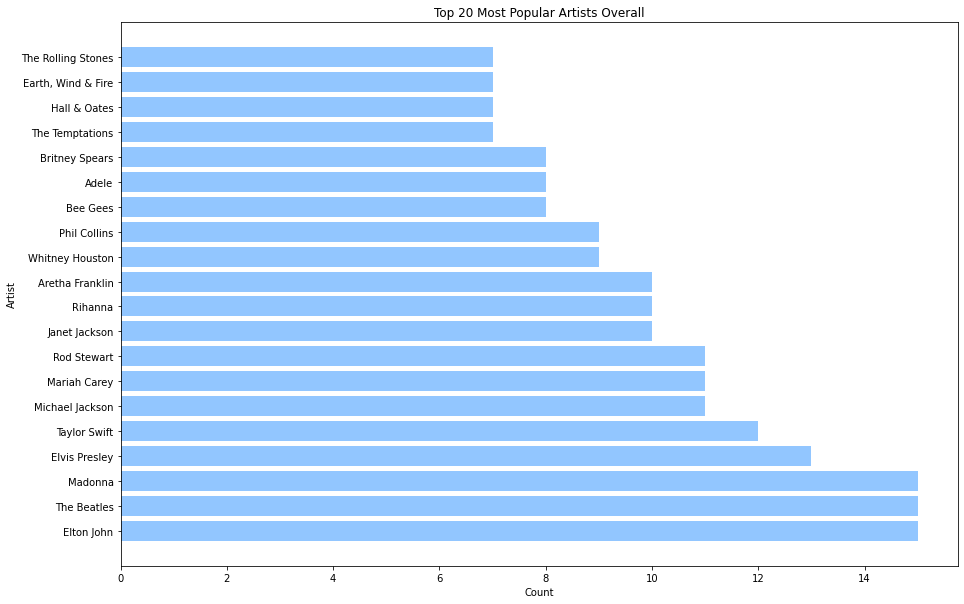

In [15]:
all_artists = Counter(all_artists_df)
plt.figure(figsize=(15,10))
plt.barh(all_artists_df["Name"][:20], all_artists_df["Count"][:20])
plt.xlabel("Count")
plt.ylabel("Artist")
plt.title("Top 20 Most Popular Artists Overall");
#plt.savefig("popularoverall");

Range: 15 to 1


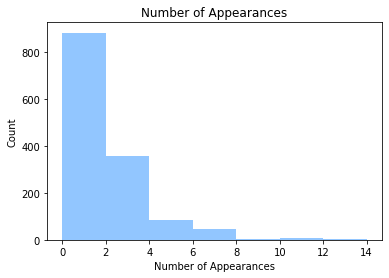

In [16]:
counts = list(all_artists_df["Count"])
print("Range:", str(counts[0]), "to", str(counts[-1]))
plt.hist(all_artists_df["Count"], bins=np.arange(0, 16, 2))
plt.xlabel("Number of Appearances")
plt.ylabel("Count")
plt.title("Number of Appearances");
#plt.savefig("img/numappear.tiff");

### Repetitiveness

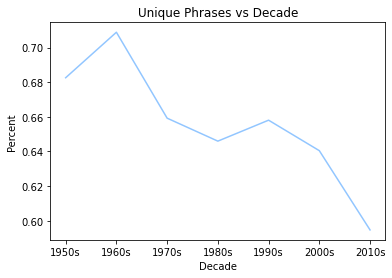

In [17]:
plt.plot(music["Decade"], music["Unique Phrases"])
plt.ylabel("Percent")
plt.xlabel("Decade")
plt.title("Unique Phrases vs Decade");
#plt.savefig("img/repvsdecade.tiff");

### Number of Characters

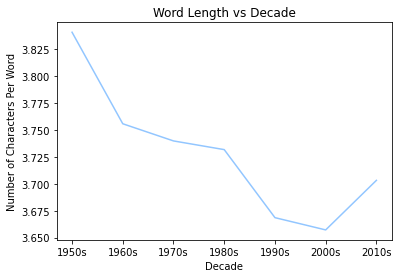

In [18]:
plt.plot(music["Decade"], music["Avg Character Count"]/music["Avg Word Count"])
plt.ylabel("Number of Characters Per Word")
plt.xlabel("Decade")
plt.title("Word Length vs Decade");
#plt.savefig("img/wordlenvsdecade.tiff");

### Number of Words

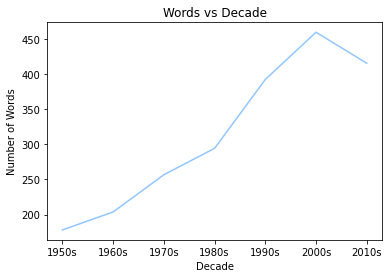

In [19]:
plt.plot(music["Decade"], music["Avg Word Count"])
plt.ylabel("Number of Words")
plt.xlabel("Decade")
plt.title("Words vs Decade");
#plt.savefig("img/wordsvsdecade.tiff");

## Frequency Analysis

In [24]:
#https://medium.com/the-omnivore/the-evolution-of-the-american-pop-lyric-61ef31b24f03
#https://en.wiktionary.org/wiki/Category:English_swear_words

decade_pov_single_1 = []
decade_pov_plural_1 = []
decade_pov_2 = []
decade_male = []
decade_female = []
decade_pov_inc = []
decade_pov_ego = []
decade_tech = []
decade_swear = []
decade_sex = []
decade_love = []
decade_names = []
first_person_single = ["i", "me", "my", "myself", "mine"]
first_person_plural = ["we", "us", "our", "ours"]
second_person = ["you", "your", "yours", "yourself", "yourselves"]
male = ["he", "his", "him"]
female = ["she", "her", "hers"]
technology = ["iphone", "phone", "call", "ring", "message", "mobile", "ring", "telephone", "cell", "beep", "dial", 
             "computer", "text", "email", "laptop", "landline", "number", "robot", "machine","nokia", "samsung",
             "apple", "google", "digit", "digits", "cellular", "cellphone", "screen", "app"]
swear_words = ["arse", "ass", "asshole", "bastard", "bitch", "bitches", "bullshit", "cock", "crap","cunt","cum", 
               "damn", "dick", "fuck","fucker", "fucked","goddamn","motherfucker", "piss", "pussy", "shit", "slut"]

for decade in music["Lyrics by Words"]:
    
    songs_pov_single_1 = []
    songs_pov_plural_1 = []
    songs_pov_2 = []
    songs_male = []
    songs_female = []
    songs_tech = []
    songs_swear = []
    
    for song in decade:
        
        words_first_single = 0
        words_first_plural = 0
        words_second = 0
        words_male = 0
        words_female = 0
        words_tech = 0
        words_swear = 0
        
        for word in song:
            
            #Count number of words in first person singular
            if word in first_person_single:
                words_first_single += 1
                
            #Count number of words in first person plural
            if word in first_person_plural:
                words_first_plural += 1
                
            #Count number of words in second person
            if word in second_person:
                words_second += 1
                
            #Count number of male pronouns
            if word in male:
                words_male += 1
                
            #Count number of female pronouns
            if word in female:
                words_female += 1
                
            #Count number of technology references
            if word in technology:
                words_tech += 1
                
            #Count number of swear words
            if word in swear_words:
                words_swear += 1     
            
                
                
        #Put it in terms of the whole song
        song_len = len(song)
        songs_pov_single_1 += [words_first_single/song_len]
        songs_pov_plural_1 += [words_first_plural/song_len]
        songs_pov_2 += [words_second/song_len]
        songs_male += [words_male/song_len]
        songs_female += [words_female/song_len]
        songs_tech += [words_tech/song_len]
        songs_swear += [words_swear/song_len]

    songs_pov_single_1 = np.mean(songs_pov_single_1)
    songs_pov_plural_1 = np.mean(songs_pov_plural_1)
    songs_pov_2 = np.mean(songs_pov_2)
    songs_male = np.mean(songs_male)
    songs_female = np.mean(songs_female)
    songs_tech = np.mean(songs_tech)
    songs_swear = np.mean(songs_swear)
 
    
    #Find the mean in each decade
    decade_pov_single_1 += [songs_pov_single_1]
    decade_pov_plural_1 += [songs_pov_plural_1]
    decade_pov_2 += [songs_pov_2]
    decade_male += [songs_male]
    decade_female += [songs_female]
    decade_pov_inc += [songs_pov_plural_1 + songs_pov_2]
    decade_pov_ego += [songs_pov_single_1 + songs_pov_plural_1]
    decade_tech += [songs_tech]
    decade_swear += [songs_swear]


In [25]:
def pos_counter(pos_tag):
    
    pos = []
    freq = []
    
    for _, tag in pos_tag:
        
        if tag not in pos:
            pos += [tag]
            freq += [1]
        else:
            freq[pos.index(tag)] += 1
            
    freq = freq/np.sum(freq)
    return pos, freq

In [26]:
import nltk
nltk.download('averaged_perceptron_tagger')
decade_pos_tag = []
decade_pos = {}

for i in np.arange(len(music["Lyrics by Words"])):
    
    decade = music["Lyrics by Words"][i]
    decade_pos_tag += [[]]
    decade_dict = {}
    
    #Populate the dictionary of the decade with the POS frequencies for each song
    for j in np.arange(len(decade)):
        
        song = decade[j]
        decade_pos_tag[i] += [pos_tag(song)]
        pos = pos_counter(decade_pos_tag[i][j])
        label = pos[0]
        freq = pos[1]
        
        for label, freq in zip(label, freq):
            
            if label in decade_pos:
                decade_dict[label] += [freq]
            else:
                decade_dict[label] = [freq]
                
    #Combine each song's frequencies into a mean
    for item in decade_dict:
        decade_dict[item] = np.mean(decade_dict[item])
        
    #Add it to the decade_pos dictionary
    decade_pos[music["Decade"][i]] = decade_dict

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [27]:
#WDT: wh-determiner, which
#WP: wh-pronoun, who, what
#WP$: possessive wh-pronoun, whose
#WRB: wh-abverb, where, when
decade_spec = []

#PRP: personal pronoun, I, he, she
decade_prp = []

#PRP$: possessive pronoun, my, his, hers
decade_prps = []

#PRP + PRP$
decade_prgen = []

for decade in decade_pos:
    
    pos = decade_pos[decade]
    
    prp = 0
    if "PRP" in pos:
        prp = pos["PRP"]
    decade_prp += [prp]  
    
    prps = 0
    if "PRP$" in pos:
        prps = pos["PRP$"]
    decade_prps += [prps] 
    
    decade_prgen += [prp + prps]
    
    spec = 0
    if "WDT" in pos:
        spec += pos["WDT"]
    if "WP" in pos:
        spec += pos["WP"]
    if "WP$" in pos:
        spec += pos["WP$"]
    if "WRB" in pos:
        spec += pos["WRB"]
    decade_spec += [spec]

In [28]:
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith("J"):
        return wordnet.ADJ
    elif treebank_tag.startswith("V"):
        return wordnet.VERB
    elif treebank_tag.startswith("N"):
        return wordnet.NOUN
    elif treebank_tag.startswith("R"):
        return wordnet.ADV
    else:
        return None

In [29]:
def lemmatize(word, tag):
    
    tag = get_wordnet_pos(tag)
    
    if tag:
        return lemmatizer.lemmatize(word, tag)
    else:
        return lemmatizer.lemmatize(word)

In [30]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english')) 
lemmatizer = WordNetLemmatizer()

unique_lyrics = []
unique_lyrics_no_stopwords = []

for i in np.arange(len(music)):
    
    decade = decade_pos_tag[i]
    unique_lyrics += [[]]
    unique_lyrics_no_stopwords += [[]]
    
    for j in np.arange(len(decade)):
        
        song = decade[j]
        
        #lemmatize words. I removed punctuations so i'll -> ill != i != ive
        unique_lyrics[i] += [set([lemmatize(word, tag) for (word, tag) in song])]
        
    #remove stopwords from unique_lyrics' entry.
    unique_lyrics_no_stopwords[i] += [[w for w in song if not w in stop_words] for song in unique_lyrics[i]] 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [31]:
#find the average number of unique words (with and without stopwords)
len_unique = []
len_unique_no_stop = []

for i in np.arange(len(music)):
    
    decade = unique_lyrics[i]
    decade_no_stop = unique_lyrics_no_stopwords[i]
    
    unique = []
    unique_no_stop = []
    for j in np.arange(len(decade)):
        
        unique += [len(decade[j])]
        unique_no_stop += [len(decade_no_stop[j])]
    
    len_unique += [np.mean(unique)]
    len_unique_no_stop += [np.mean(unique_no_stop)]
len_unique_percent = len_unique/music["Avg Word Count"]
len_unique_no_stop_percent = len_unique_no_stop/music["Avg Word Count"]

## Visualization
### Parts of Speech

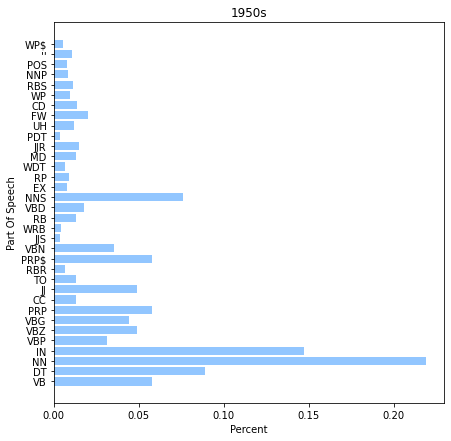

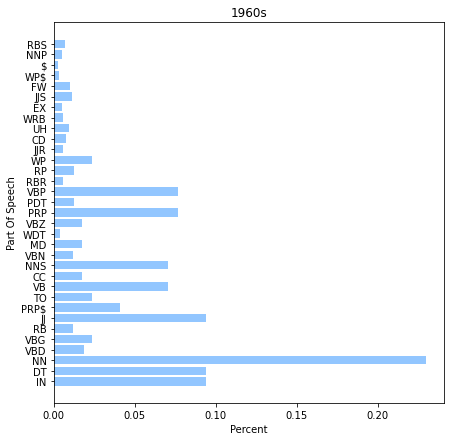

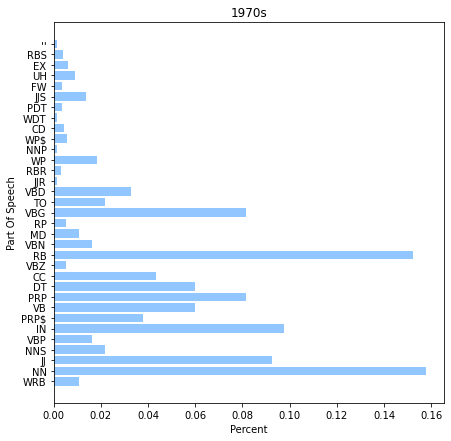

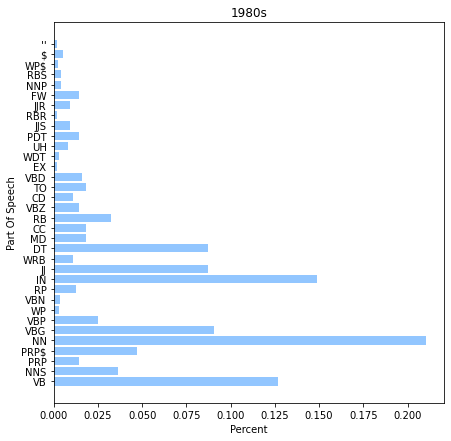

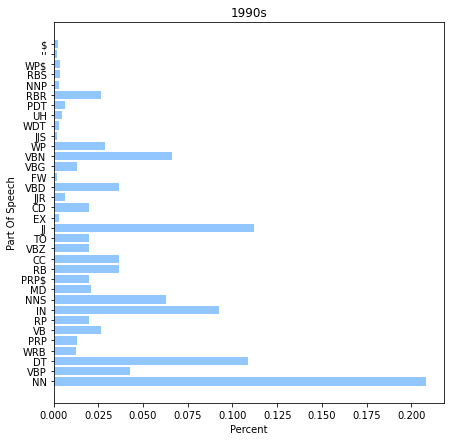

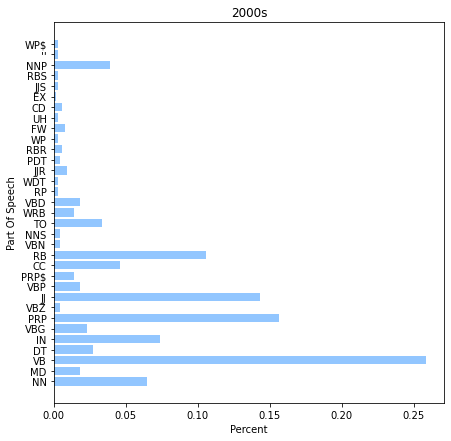

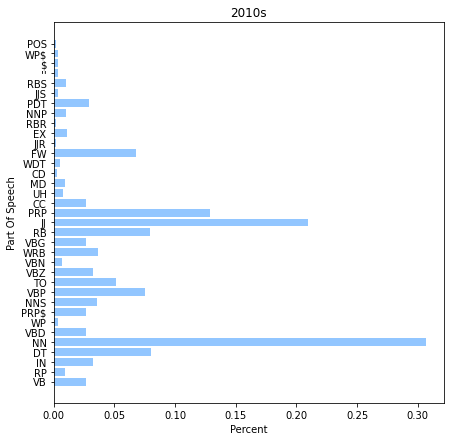

In [32]:
for decade in decade_pos:
    plt.figure(figsize=(7,7))
    plt.title(decade)
    plt.barh(list(decade_pos[decade].keys()), list(decade_pos[decade].values()))
    plt.ylabel("Part Of Speech")
    plt.xlabel("Percent")
    #plt.savefig("img/"+decade+"pos.tiff")
    plt.show();

### Speculative Words

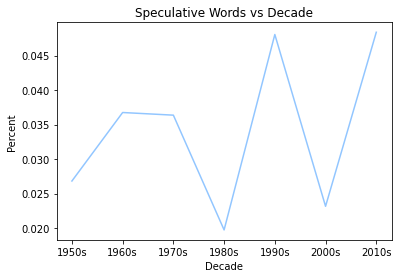

In [33]:
plt.plot(music["Decade"], decade_spec)
plt.ylabel("Percent")
plt.xlabel("Decade")
plt.title("Speculative Words vs Decade");
#plt.savefig("img/specvsdecade.tiff");

### Personal Pronouns

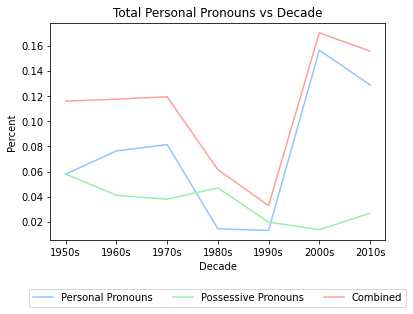

In [34]:
plt.plot(music["Decade"], decade_prp, label="Personal Pronouns")
plt.plot(music["Decade"], decade_prps, label="Possessive Pronouns")
plt.plot(music["Decade"], decade_prgen, label="Combined")
plt.ylabel("Percent")
plt.xlabel("Decade")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.title("Total Personal Pronouns vs Decade");
#plt.savefig("img/prpvsdecade.tiff");

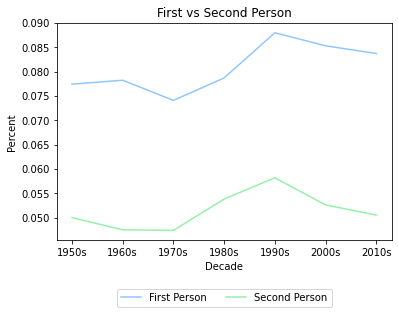

In [35]:
plt.plot(music["Decade"], decade_pov_ego, label="First Person")
plt.plot(music["Decade"], decade_pov_2, label="Second Person")
plt.ylabel("Percent")
plt.xlabel("Decade")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.title("First vs Second Person");
#plt.savefig("img/firstvssecond.tiff");

### Intimacy

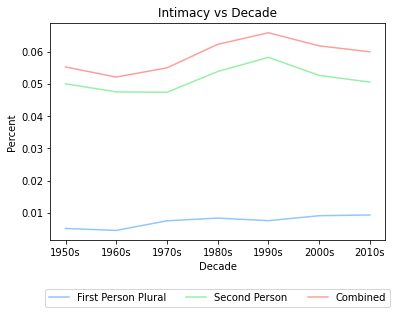

In [36]:
plt.plot(music["Decade"], decade_pov_plural_1, label="First Person Plural")
plt.plot(music["Decade"], decade_pov_2, label="Second Person")
plt.plot(music["Decade"], decade_pov_inc, label="Combined")
plt.ylabel("Percent")
plt.xlabel("Decade")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.title("Intimacy vs Decade");
#plt.savefig("img/intimvsdecade.tiff");

### Egocentricity

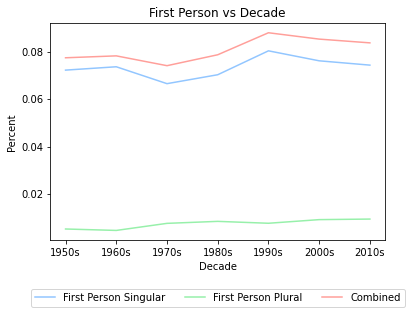

In [37]:
plt.plot(music["Decade"], decade_pov_single_1, label="First Person Singular")
plt.plot(music["Decade"], decade_pov_plural_1, label="First Person Plural")
plt.plot(music["Decade"], decade_pov_ego, label="Combined")
plt.ylabel("Percent")
plt.xlabel("Decade")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.title("First Person vs Decade");
#plt.savefig("img/firstvsdecade.tiff");

### Gendered Pronouns

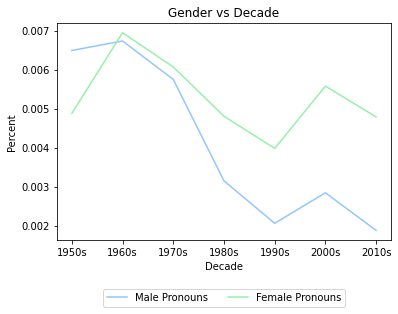

In [38]:
plt.plot(music["Decade"], decade_male, label="Male Pronouns")
plt.plot(music["Decade"], decade_female, label="Female Pronouns")
plt.ylabel("Percent")
plt.xlabel("Decade")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.title("Gender vs Decade");
#plt.savefig("img/gendervsdecade.tiff");

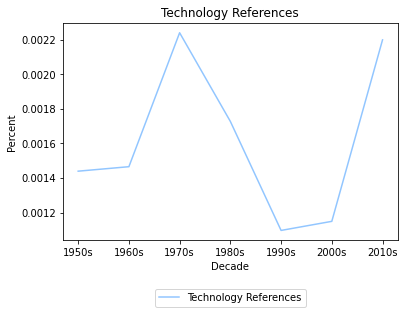

In [39]:
plt.plot(music["Decade"], decade_tech, label="Technology References")
#plt.plot(music["Decade"], decade_female, label="Female Pronouns")
plt.ylabel("Percent")
plt.xlabel("Decade")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.title("Technology References");
#plt.savefig("img/gendervsdecade.tiff");

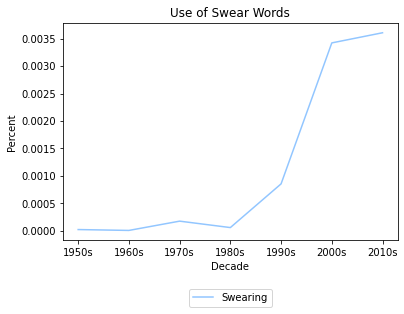

In [40]:
plt.plot(music["Decade"], decade_swear, label="Swearing")
#plt.plot(music["Decade"], decade_female, label="Female Pronouns")
plt.ylabel("Percent")
plt.xlabel("Decade")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.title("Use of Swear Words");
#plt.savefig("img/gendervsdecade.tiff");

### Uniqueness (Lexical Diversity)

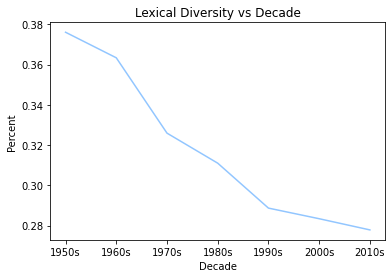

In [43]:
plt.plot(music["Decade"], len_unique_percent)
plt.ylabel("Percent")
plt.xlabel("Decade")
plt.title("Lexical Diversity vs Decade");
#plt.savefig("img/uniquestopvsdecade.tiff");

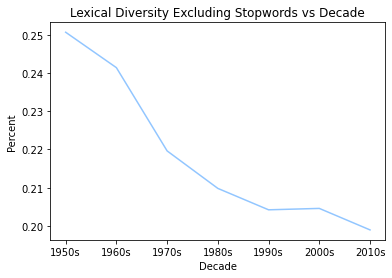

In [44]:
plt.plot(music["Decade"], len_unique_no_stop_percent)
plt.ylabel("Percent")
plt.xlabel("Decade")
plt.title("Lexical Diversity Excluding Stopwords vs Decade");
#plt.savefig("img/uniquenostopcountvsdecade.tiff");

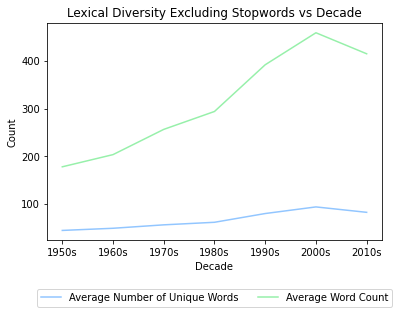

In [45]:
plt.plot(music["Decade"], len_unique_no_stop, label="Average Number of Unique Words")
plt.plot(music["Decade"], music["Avg Word Count"], label="Average Word Count")
plt.ylabel("Count")
plt.xlabel("Decade")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.title("Lexical Diversity Excluding Stopwords vs Decade");
#plt.savefig("img/uniquenostopcountvsdecade.tiff");

## Network Graph

In [46]:
#List of all nodes
all_nodes = []

decades = music["Decade"]
#Removes duplicate years
years = set(data["Year"])
songs = data["Song"]
#Removes quotes around song titles
songs = [song.replace("\"", "") for song in songs]
unique_words_no_stop = unique_lyrics_no_stopwords

all_nodes.extend(decades)
all_nodes.extend(years)
all_nodes.extend(songs)
for decade in unique_words_no_stop:
    for song in decade:
        all_nodes.extend(song)
        
node_type = []
node_type += ["Decade"] * len(decades)
node_type += ["Year"] * len(years)
node_type += ["Song"] * len(songs)
node_type += ["Words"] * (len(all_nodes) - len(node_type))

type_corr = {"Decade":4, "Year":3, "Song":2, "Words":1}
int_type = [type_corr.get(num) for num in node_type]

all_nodes = pd.DataFrame(data={"Id":all_nodes, "Label":all_nodes, "Type":node_type, "Int Type":int_type})
print(all_nodes.shape)
all_nodes.head()

(171651, 4)


,Id,Label,Type,Int Type
0,1950s,1950s,Decade,4
1,1960s,1960s,Decade,4
2,1970s,1970s,Decade,4
3,1980s,1980s,Decade,4
4,1990s,1990s,Decade,4


In [49]:
# #List of all edges
# src = []
# tgt = []

# #Edges from years to the decade
# points_in_decade = sum(data["Year"].isin(np.arange(data["Year"][0], data["Year"][0] + 10)))
# start = 0
# for year in decades:
#     if start + points_in_decade > len(data["Year"]):
#         points_in_decade = len(data["Year"]) - start
#     print(list(data["Year"][start:start + points_in_decade]))
#     src += list(data["Year"][start:start + points_in_decade])
#     tgt += [year] * points_in_decade
#     start += points_in_decade
# #Edges from songs to years
# src += songs
# tgt += list(data["Year"])

# #Edges from unique words to song
# song_ind = 0
# for i in np.arange(len(music)):
    
#     decade_lyrics = unique_lyrics_no_stopwords[i]
    
#     for j in np.arange(len(decade_lyrics)):
#         lyrics = decade_lyrics[j]
#         src += lyrics
#         tgt += [songs[song_ind]] * len(lyrics)
#         song_ind += 1

# all_edges = pd.DataFrame(data={"Id":np.arange(len(src)), "Source":src, "Target":tgt})
# print(all_edges.shape)
# all_edges.head()

In [50]:
# all_nodes.to_csv("lyric_nodes.csv",index=False)
# all_edges.to_csv("lyric_edges.csv",index=False)

## Sentiment Analysis

In [51]:
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

#total counts the total number of phrases in positive, neutral, and negative
sentiments = ["positive", "neutral", "negative"]
sentiment_summary = {"positive":[], "neutral":[], "negative":[], "total":[]}

#Analyze each phrase (line) and categorize the sentiment.
for i in np.arange(len(music)):
    
    decade = music["Lyrics"][i]
    
    for key in sentiment_summary.keys():
        
        sentiment_summary[key] += [0]
        
    for j in np.arange(len(decade)):
        
        song = decade[j].split("\n")
        
        for phrase in song:
            
            sentiment_score = sid.polarity_scores(phrase)
            
            sentiment_summary["total"][i] += 1
            
            if sentiment_score["compound"] == 0.0:
                sentiment_summary["neutral"][i] += 1
            elif sentiment_score["compound"] > 0.0:
                sentiment_summary["positive"][i] += 1
            else:
                sentiment_summary["negative"][i] += 1

sentiment_summary["neutral"] = [sent/total for sent, total 
                                in zip(sentiment_summary["neutral"],
                                       sentiment_summary["total"])]
sentiment_summary["positive"] = [sent/total for sent, total 
                                in zip(sentiment_summary["positive"],
                                       sentiment_summary["total"])]
sentiment_summary["negative"] = [sent/total for sent, total 
                                in zip(sentiment_summary["negative"],
                                       sentiment_summary["total"])]
                
print(sentiment_summary)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
{'positive': [0.25451092117758783, 0.24205490374757946, 0.24250782150502223, 0.23031685497380333, 0.2416626720536876, 0.21425521177064327, 0.22681391165300818], 'neutral': [0.6562203228869895, 0.6541747351634583, 0.6505845545858719, 0.6602986776918416, 0.6416832157775799, 0.6497146628362902, 0.6396662002798321], 'negative': [0.0892687559354226, 0.1037703610889623, 0.10690762390910588, 0.10938446733435506, 0.11665411216873245, 0.1360301253930665, 0.1335198880671597], 'total': [7371, 17558, 24292, 28057, 29206, 25759, 20012]}


## Visualization

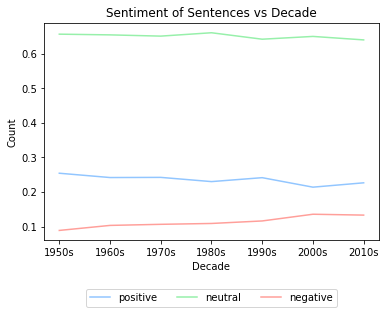

In [52]:
for sentiment in sentiments:
    plt.plot(music["Decade"], sentiment_summary[sentiment], label=sentiment)
plt.ylabel("Count")
plt.xlabel("Decade")
plt.title("Sentiment of Sentences vs Decade");
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3);
#plt.savefig("img/sentvsdecade.tiff");

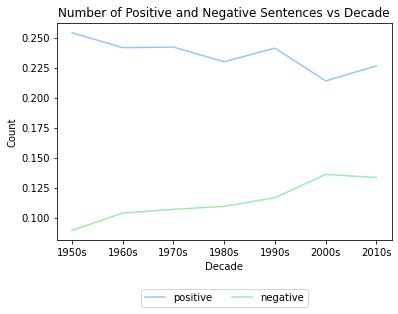

In [53]:
plt.plot(music["Decade"], sentiment_summary[sentiments[0]], label=sentiments[0])
plt.plot(music["Decade"], sentiment_summary[sentiments[2]], label=sentiments[2])
plt.ylabel("Count")
plt.xlabel("Decade")
plt.title("Number of Positive and Negative Sentences vs Decade");
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3);
#plt.savefig("img/posnegvsdecade.tiff");

## Common Words

In [54]:
#Creating lyrics lists

#By decade
lyrics_by_decade_list = []

#Overall
lyrics_freq_list = []

for i in np.arange(len(music)):
    
    decade = decade_pos_tag[i]
    lyrics_by_decade_list += [[]]
    
    for j in np.arange(len(decade)):
        
        song = decade[j]
        
        #Removing stopwords
        lyrics = [lemmatize(word, tag) for (word, tag) in song]
        lyrics = [w for w in lyrics if not w in stop_words]
        
        lyrics_by_decade_list[i] += lyrics
        lyrics_freq_list += lyrics


#Converting lyrics lists to counters
#By decade
lyrics_by_decade = [Counter(lyrics) for lyrics in lyrics_by_decade_list]

#Overall
lyrics_freq = Counter(lyrics_freq_list)

In [55]:
decade_lyric_freqs = [pd.DataFrame(data={"Word":list(decade.keys()),
                                         "Count":list(decade.values())})
                      .sort_values("Count", ascending=False)
                      for decade in lyrics_by_decade]
decade_lyric_freqs[0].head()

,Word,Count
19,love,528
98,know,236
116,oh,223
207,get,220
654,baby,216


In [56]:
overall_lyric_freq = pd.DataFrame(data={"Word":list(lyrics_freq.keys()),
                                        "Count":list(lyrics_freq.values())})
overall_lyric_freq = overall_lyric_freq.sort_values("Count", ascending=False)
overall_lyric_freq.head()

,Word,Count
19,love,8844
207,get,8298
234,im,6618
98,know,6295
103,dont,6164


In [57]:
vectorizer = TfidfVectorizer(max_df=0.80, min_df=3, max_features=5000, stop_words=stop_words)

decade_lyrics = []

for i in np.arange(len(music["Lyrics w/o Punctuation"])):
    decade_lyrics += [" ".join(music["Lyrics w/o Punctuation"][i])]

tfidf = vectorizer.fit_transform(decade_lyrics)
tfidf = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names())

common = []

for i in np.arange(len(music)):
    print("Most common words of", music["Decade"][i], "are:")
    common += [tfidf.iloc[i].sort_values(ascending=False)]
    print(tfidf.iloc[i].sort_values(ascending=False).head(), "\n")

Most common words of 1950s are:
davy    0.379309
dee     0.356659
nana    0.275861
dat     0.269443
bop     0.204555
Name: 0, dtype: float64 

Most common words of 1960s are:
twist    0.311149
duke     0.267690
pa       0.198414
dum      0.195620
wah      0.195620
Name: 1, dtype: float64 

Most common words of 1970s are:
du       0.618179
float    0.246194
bang     0.178321
lucy     0.175853
hoo      0.154545
Name: 2, dtype: float64 

Most common words of 1980s are:
heat        0.270487
miracle     0.231717
diana       0.215551
material    0.168428
church      0.159071
Name: 3, dtype: float64 

Most common words of 1990s are:
dit       0.403441
diggin    0.226853
wha       0.171969
damn      0.158614
sexy      0.155831
Name: 4, dtype: float64 

Most common words of 2000s are:
gon      0.406176
nigga    0.335449
fuck     0.260680
shit     0.208877
dem      0.204098
Name: 5, dtype: float64 

Most common words of 2010s are:
fuck     0.312575
nigga    0.310152
ayy      0.309787
bitch    0.

In [58]:
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=20, random_state=0)
lda = lda.fit(tfidf)

In [59]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #{}:".format(topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [60]:
tf_feature_names = vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, 50)


Topic #0:
dit twist heat wah duke dum miracle dada pa dee diggin diana funky stroke fantasy sexy material wha damn church dontcha johnny chorus dem ich gon sings nigga motion america writer monkey niggas dangerous bop und ave breakdown lots voices hoo yea self rockabye judge victory cream wo slide shit

Topic #1:
davy dee nana dat bop un sha sue dum thrill rare ta henry butterfly robin gully ivy goose rag johnny amore jones yeahyeah yak island lee suede pink tiger con ideas thrills teardrops mary donna charms charlie stagger stroll hearted chances chorus wisdom dot dios forbid texas sigh wah fountain

Topic #2:
mary yeahyeah chorus beware sha un thrill pink lonesome tennessee trees pa bell chicken jones knockin someones sue boo headed tap teardrops charms shall instrumental began iii fooling zone changes maria flip sigh often danger village softly sixteen robin und joe begun oooo pretending tu tiger harbor holy chances sings

Topic #3:
nigga gon du fuck ayy bitch niggas shit lil thund

In [61]:
n_topics = 2
for i in range(len(music["Lyrics"])):
    print("\nTopics of the", music["Decade"][i]+":")
    decade_vec = TfidfVectorizer(max_df=0.80, min_df=3, max_features=5000, stop_words=stop_words)
    decade_tfidf = decade_vec.fit_transform(music["Lyrics w/o Punctuation"][i])
    decade_lda = LatentDirichletAllocation(n_components=n_topics, max_iter=20, random_state=0)
    decade_lda = decade_lda.fit(decade_tfidf)
    decade_tf_feature_names = decade_vec.get_feature_names()
    print_top_words(decade_lda, decade_tf_feature_names, 50)


Topics of the 1950s:

Topic #0:
love heart know dont baby im oh ill one like come say youre time true never go make tell youll let yeah well want hold thats please blue day dream lonely mine take kiss much back get cause see night theres need home dear give eyes way alone got along

Topic #1:
dee rock hill little hes gonna roll tall wild green late loves brown door bird la us wake war everybody sugar got slow ooh music rare rose lee dog song goes man mama behind look rockin get glow knows pay waltz go lets mornin jack stroll whos frontier wanna youre

Topics of the 1960s:

Topic #0:
ha na shake angel bird wo rose dig gas san burn de sang footsteps wind laughing johnny pray jack fire beyond blows cradle top fate cast sail songs heaven papa means twist yo tree singing grass el year month pay tide set word tired wipe rock bridge sailing moon stars

Topic #1:
love baby oh dont im yeah know come go got little ill youre say time girl never heart one hey let cant want see like good sweet get

## Visualization
### Top 10 most Frequent Words
#### By Decade

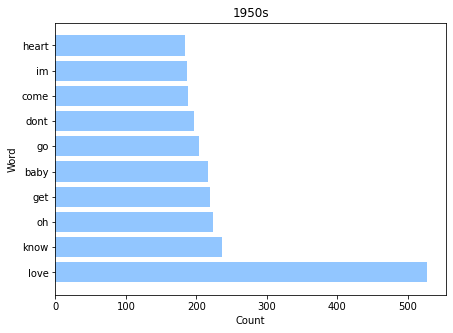

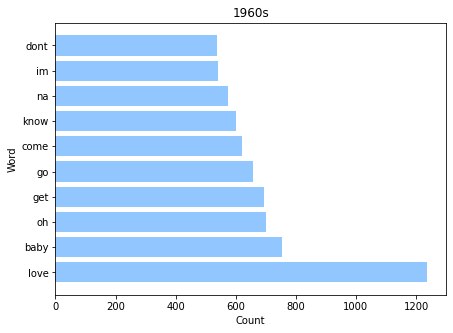

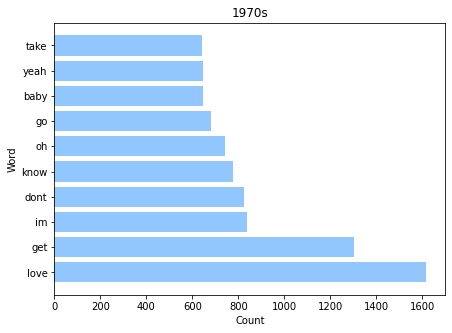

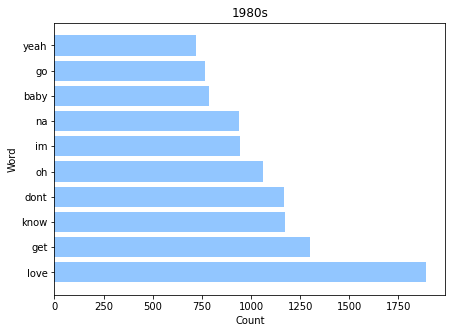

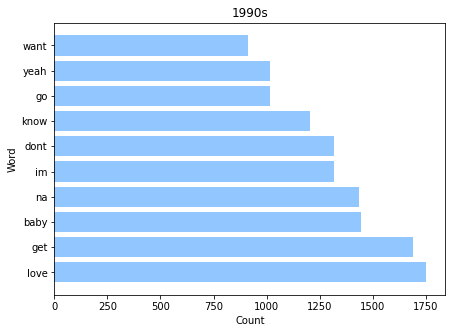

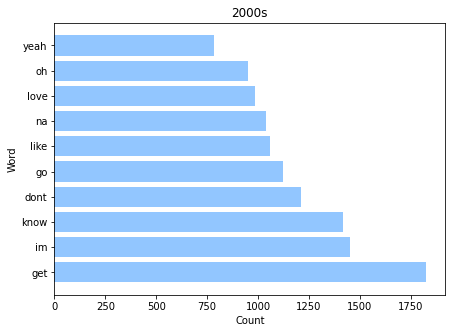

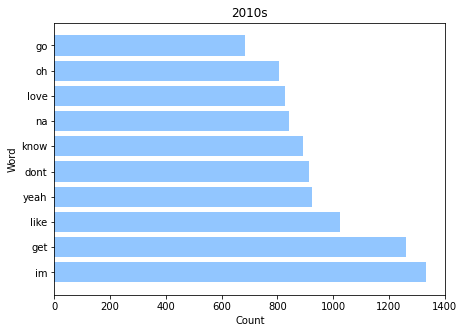

In [62]:
titles = music["Decade"]
i = 0
words_10 = []
for decade in decade_lyric_freqs:
    words_10.extend(list(decade["Word"]))
    plt.figure(figsize=(7,5))
    plt.barh(decade["Word"][:10], decade["Count"][:10])
    plt.title(titles[i])
    plt.ylabel("Word")
    plt.xlabel("Count")
    #plt.savefig("img/"+titles[i]+"wordbar.tiff")
    plt.show();
    i += 1
words_10 = Counter(words_10)

In [63]:
#max is 7
words_10_duplicates = [i for i in words_10.elements() if words_10[i] > 6]
print(Counter(words_10_duplicates))

Counter({'love': 7, 'know': 7, 'oh': 7, 'get': 7, 'baby': 7, 'go': 7, 'dont': 7, 'come': 7, 'im': 7, 'heart': 7, 'say': 7, 'make': 7, 'na': 7, 'youre': 7, 'ill': 7, 'want': 7, 'let': 7, 'one': 7, 'well': 7, 'like': 7, 'tell': 7, 'time': 7, 'kiss': 7, 'day': 7, 'little': 7, 'never': 7, 'rock': 7, 'gon': 7, 'dream': 7, 'yeah': 7, 'see': 7, 'night': 7, 'ooh': 7, 'thats': 7, 'home': 7, 'true': 7, 'dance': 7, 'take': 7, 'blue': 7, 'cause': 7, 'hear': 7, 'give': 7, 'cant': 7, 'hold': 7, 'youll': 7, 'back': 7, 'tonight': 7, 'find': 7, 'please': 7, 'mine': 7, 'eye': 7, 'every': 7, 'way': 7, 'lonely': 7, 'good': 7, 'man': 7, 'need': 7, 'old': 7, 'along': 7, 'sweet': 7, 'right': 7, 'much': 7, 'keep': 7, 'shes': 7, 'music': 7, 'still': 7, 'start': 7, 'away': 7, 'late': 7, 'arm': 7, 'could': 7, 'fool': 7, 'alone': 7, 'yes': 7, 'leave': 7, 'girl': 7, 'light': 7, 'call': 7, 'wait': 7, 'around': 7, 'hey': 7, 'walk': 7, 'ive': 7, 'moon': 7, 'dear': 7, 'lover': 7, 'talk': 7, 'big': 7, 'ever': 7, 'hand'

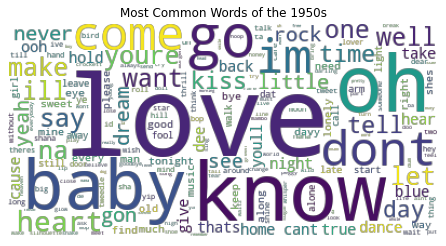

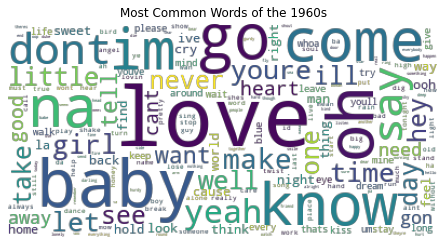

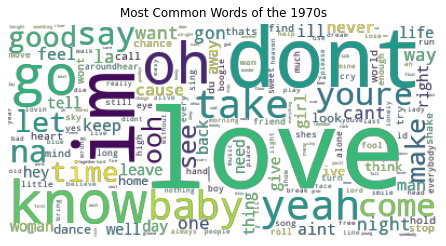

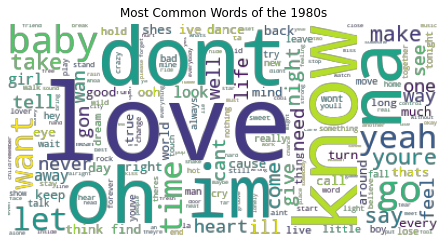

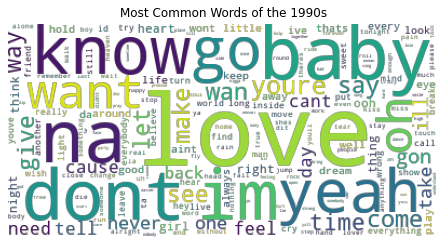

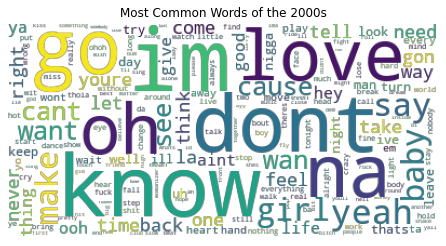

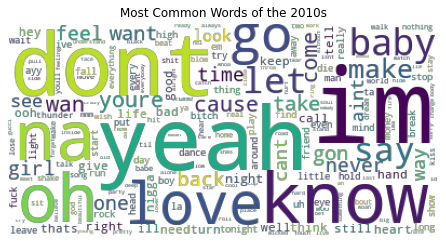

In [64]:
titles = music["Decade"]
i = 0

for decade in lyrics_by_decade_list:
    decade = " ".join(decade)
    wordcloud = WordCloud(mode="RGBA", background_color=None, collocations=False).generate(decade)
    fig = plt.figure()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.title("Most Common Words of the " + titles[i])
    plt.show();
    #wordcloud.to_file("img/"+titles[i]+"words.tiff")
    i += 1

#### Overall

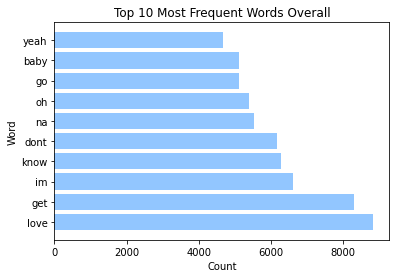

In [65]:
plt.barh(overall_lyric_freq["Word"][:10], overall_lyric_freq["Count"][:10])
plt.xlabel("Count")
plt.ylabel("Word")
plt.title("Top 10 Most Frequent Words Overall");
#plt.savefig("img/overallwordbar.tiff");

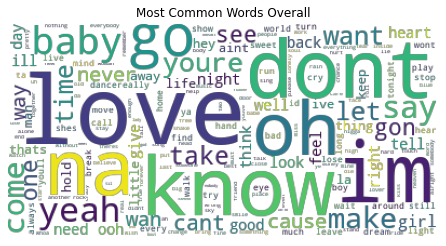

In [66]:
overall = " ".join(lyrics_freq_list)
wordcloud = WordCloud(mode="RGBA", background_color=None, collocations=False).generate(overall)
fig = plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Most Common Words Overall")
plt.show();
#wordcloud.to_file("img/overallwords.tiff");

### TF-IDF

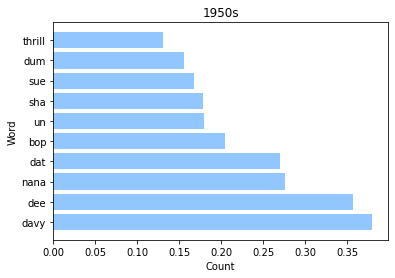

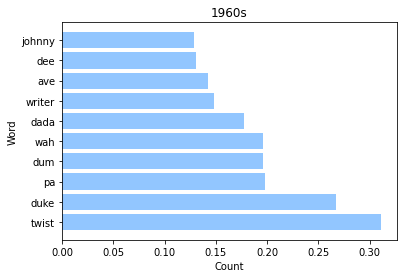

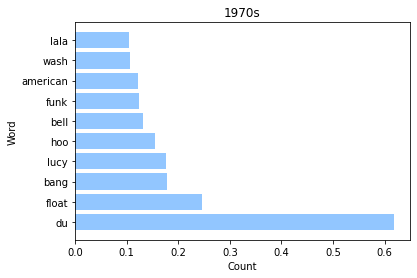

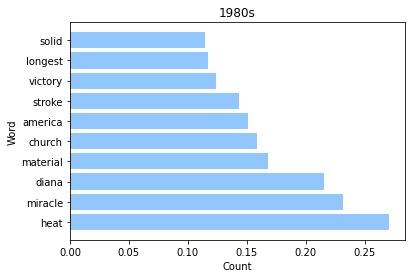

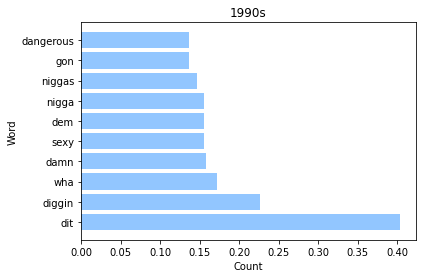

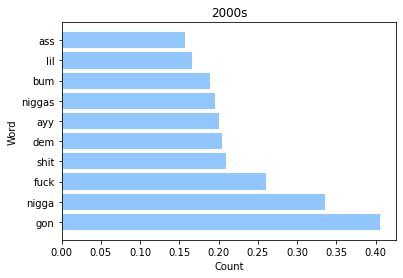

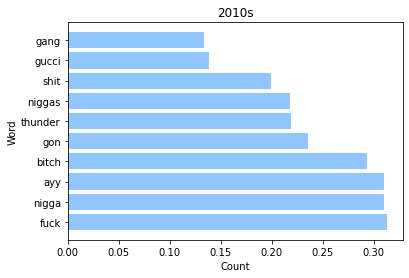

In [67]:
titles = music["Decade"]
i = 0

for decade in common:
    plt.barh(decade.index[:10], decade[:10])
    plt.title(titles[i])
    plt.xlabel("Count")
    plt.ylabel("Word")
    #plt.savefig("img/"+titles[i]+"wordbar.tiff")
    plt.show();
    i += 1

# Conclusion and Further Paths of Research


# Related Works and What I Could've Done Better

# Things to Consider Next Time
